In [26]:
# Battery Feature Extraction Notebook
# This notebook processes battery datasets and extracts standardized features for SoH, RUL, SoC prediction

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown
import os

# Import our custom modules
from battery_feature_mapper import BatteryFeatureMapper
from data_loader import BatteryDataLoader

# Setup visualization
plt.style.use('default')
sns.set_palette("husl")
%matplotlib inline

In [27]:
# Initialize the data loader
loader = BatteryDataLoader()
feature_mapper = BatteryFeatureMapper()

print("Battery Feature Extraction System")
print("=" * 50)
print("Extracted features for prediction: capacity, voltage, current, temperature, discharge_time, charge_time")
print("Target variables to predict later: SoH, RUL, SoC")
print("Note: Target variables will be calculated/predicted in the modeling phase")

Battery Feature Extraction System
Extracted features for prediction: capacity, voltage, current, temperature, discharge_time, charge_time
Target variables to predict later: SoH, RUL, SoC
Note: Target variables will be calculated/predicted in the modeling phase


In [28]:
# Configuration cell - Modify these parameters for your dataset

# File path to your battery dataset
DATA_FILE_PATH = "your_battery_data.csv"  # Change this to your file path

# Prediction target (for reference only - not extracted from data)
PREDICTION_TARGET = "SoH"  # Change to "SoH", "RUL", or "SoC" based on what you want to predict

# Additional parameters for data loading (if needed)
LOAD_KWARGS = {
    # 'sep': ',',           # For CSV files
    # 'sheet_name': 0,      # For Excel files
    # 'encoding': 'utf-8'   # Encoding if needed
}

print(f"Configuration:")
print(f"Data file: {DATA_FILE_PATH}")
print(f"Prediction target: {PREDICTION_TARGET} (will be calculated later)")

Configuration:
Data file: your_battery_data.csv
Prediction target: SoH (will be calculated later)


In [ ]:
# Load and process the dataset
try:
    results = loader.process_dataset(
        file_path=DATA_FILE_PATH,
        **LOAD_KWARGS
    )
    
    raw_df = results['raw_data']
    processed_df = results['processed_data']
    feature_mapping = results['feature_mapping']
    available_features = results['available_features']
    
    # Handle missing values
    MISSING_VALUE_STRATEGY = "mean"  # Options: 'mean', 'median', 'drop', 'forward_fill'
    processed_df = feature_mapper.handle_missing_values(processed_df, strategy=MISSING_VALUE_STRATEGY)
    
except Exception as e:
    print(f"Error loading dataset: {e}")
    print("Please check the file path and format.")
    
    # Example with sample data for demonstration
    print("\nCreating sample data for demonstration...")
    sample_data = {
        'Batt_Capacity_mAh': [3000, 2950, 2900, 2850, 2800, 2750, 2700, 2650],
        'Cell_Voltage_V': [3.7, 3.68, 3.65, 3.62, 3.58, 3.55, 3.52, 3.48],
        'Current_A': [1.5, 1.48, 1.45, 1.43, 1.40, 1.38, 1.35, 1.32],
        'Temperature_C': [25, 25.5, 26, 26.5, 27, 27.5, 28, 28.5],
        'Discharge_Time_s': [7200, 7150, 7100, 7050, 7000, 6950, 6900, 6850],
        'Charge_Time_min': [120, 119, 118, 117, 116, 115, 114, 113],
        'Cycle_Number': [1, 2, 3, 4, 5, 6, 7, 8]  # Common in battery datasets for degradation tracking
    }
    raw_df = pd.DataFrame(sample_data)
    results = loader.process_dataset_from_df(raw_df)
    processed_df = results['processed_data']
    feature_mapping = results['feature_mapping']
    available_features = results['available_features']
    
    # Handle missing values for sample data too
    processed_df = feature_mapper.handle_missing_values(processed_df, strategy=MISSING_VALUE_STRATEGY)

Error loading dataset: [Errno 2] No such file or directory: 'your_battery_data.csv'
Please check the file path and format.

Creating sample data for demonstration...
Original dataset shape: (8, 7)
Original columns: ['Batt_Capacity_mAh', 'Cell_Voltage_V', 'Current_A', 'Temperature_C', 'Discharge_Time_s', 'Charge_Time_min', 'Cycle_Number']
Detected feature mapping: {'capacity': 'Batt_Capacity_mAh', 'voltage': 'Cell_Voltage_V', 'current': 'Current_A', 'temperature': 'Temperature_C', 'discharge_time': 'Discharge_Time_s', 'charge_time': 'Charge_Time_min'}
Processed dataset shape: (8, 6)
Available features: ['capacity', 'voltage', 'current', 'temperature', 'discharge_time', 'charge_time']


In [30]:
# Display dataset information
display(Markdown("## Dataset Overview"))

display(Markdown("### Original Data"))
print(f"Original data shape: {raw_df.shape}")
display(raw_df.head())

display(Markdown("### Processed Data with Standardized Features"))
print(f"Processed data shape: {processed_df.shape}")
print("Note: These features will be used to predict the target variable")
display(processed_df.head())

display(Markdown("### Feature Mapping"))
for standard_feature, original_column in feature_mapping.items():
    print(f"{standard_feature:15} -> {original_column}")

display(Markdown("### Available Features for Prediction"))
print(f"Total input features: {len(available_features)}")
print(f"Features: {available_features}")

## Dataset Overview

### Original Data

Original data shape: (8, 7)


,Batt_Capacity_mAh,Cell_Voltage_V,Current_A,Temperature_C,Discharge_Time_s,Charge_Time_min,Cycle_Number
0,3000,3.70,1.50,25.0,7200,120,1
1,2950,3.68,1.48,25.5,7150,119,2
2,2900,3.65,1.45,26.0,7100,118,3
3,2850,3.62,1.43,26.5,7050,117,4
4,2800,3.58,1.40,27.0,7000,116,5


### Processed Data with Standardized Features

Processed data shape: (8, 6)
Note: These features will be used to predict the target variable


,capacity,voltage,current,temperature,discharge_time,charge_time
0,3000,3.70,1.50,25.0,7200,120
1,2950,3.68,1.48,25.5,7150,119
2,2900,3.65,1.45,26.0,7100,118
3,2850,3.62,1.43,26.5,7050,117
4,2800,3.58,1.40,27.0,7000,116


### Feature Mapping

capacity        -> Batt_Capacity_mAh
voltage         -> Cell_Voltage_V
current         -> Current_A
temperature     -> Temperature_C
discharge_time  -> Discharge_Time_s
charge_time     -> Charge_Time_min


### Available Features for Prediction

Total input features: 6
Features: ['capacity', 'voltage', 'current', 'temperature', 'discharge_time', 'charge_time']


In [31]:
# Data Quality Check
display(Markdown("## Data Quality Analysis"))

display(Markdown("### Missing Values"))
missing_data = processed_df.isnull().sum()
missing_percent = (missing_data / len(processed_df)) * 100

missing_info = pd.DataFrame({
    'Feature': missing_data.index,
    'Missing Count': missing_data.values,
    'Missing Percentage': missing_percent.values
})
display(missing_info[missing_info['Missing Count'] > 0])

if missing_data.sum() > 0:
    display(Markdown("**Note:** Consider handling missing values before model training."))
else:
    display(Markdown("**Good:** No missing values found."))

## Data Quality Analysis

### Missing Values

,Feature,Missing Count,Missing Percentage


**Good:** No missing values found.

In [32]:
# Basic Statistics
display(Markdown("## Basic Statistics of Input Features"))

display(processed_df.describe())

## Basic Statistics of Input Features

,capacity,voltage,current,temperature,discharge_time,charge_time
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.00000
mean,2825.000000,3.597500,1.413750,26.750000,7025.000000,116.50000
std,122.474487,0.078331,0.062778,1.224745,122.474487,2.44949
min,2650.000000,3.480000,1.320000,25.000000,6850.000000,113.00000
25%,2737.500000,3.542500,1.372500,25.875000,6937.500000,114.75000
50%,2825.000000,3.600000,1.415000,26.750000,7025.000000,116.50000
75%,2912.500000,3.657500,1.457500,27.625000,7112.500000,118.25000
max,3000.000000,3.700000,1.500000,28.500000,7200.000000,120.00000


## Feature Distributions

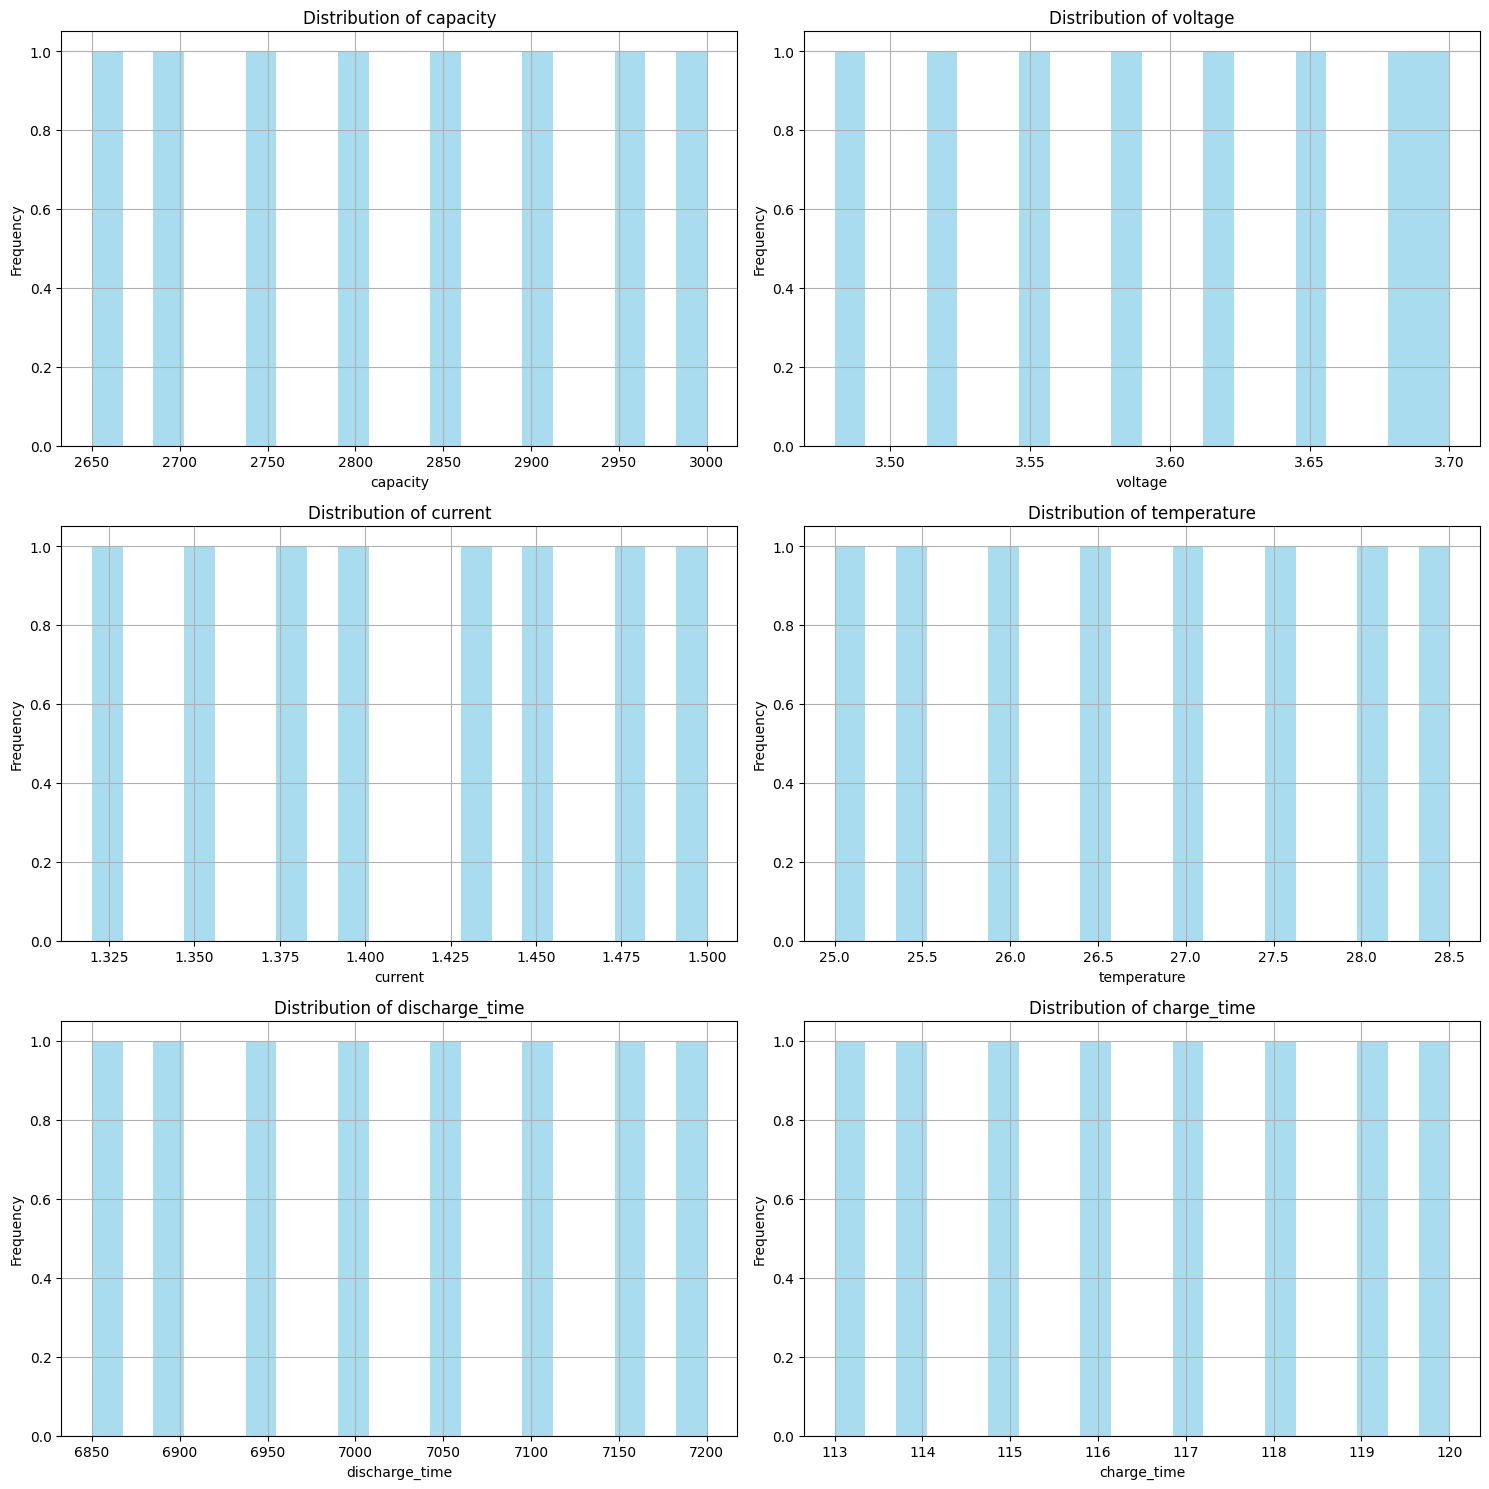

In [33]:
# Feature Distributions
display(Markdown("## Feature Distributions"))

if len(processed_df.columns) > 0:
    numerical_features = processed_df.select_dtypes(include=[np.number]).columns
    
    if len(numerical_features) > 0:
        n_cols = 2
        n_rows = (len(numerical_features) + n_cols - 1) // n_cols
        
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
        if n_rows == 1:
            axes = [axes] if n_cols == 1 else axes
        else:
            axes = axes.flatten()
        
        for i, feature in enumerate(numerical_features):
            if i < len(axes):
                processed_df[feature].hist(bins=20, ax=axes[i], alpha=0.7, color='skyblue')
                axes[i].set_title(f'Distribution of {feature}')
                axes[i].set_xlabel(feature)
                axes[i].set_ylabel('Frequency')
        
        # Hide empty subplots
        for i in range(len(numerical_features), len(axes)):
            axes[i].set_visible(False)
        
        plt.tight_layout()
        plt.show()
    else:
        print("No numerical features to plot.")
else:
    print("No features available for visualization.")

## Feature Correlations

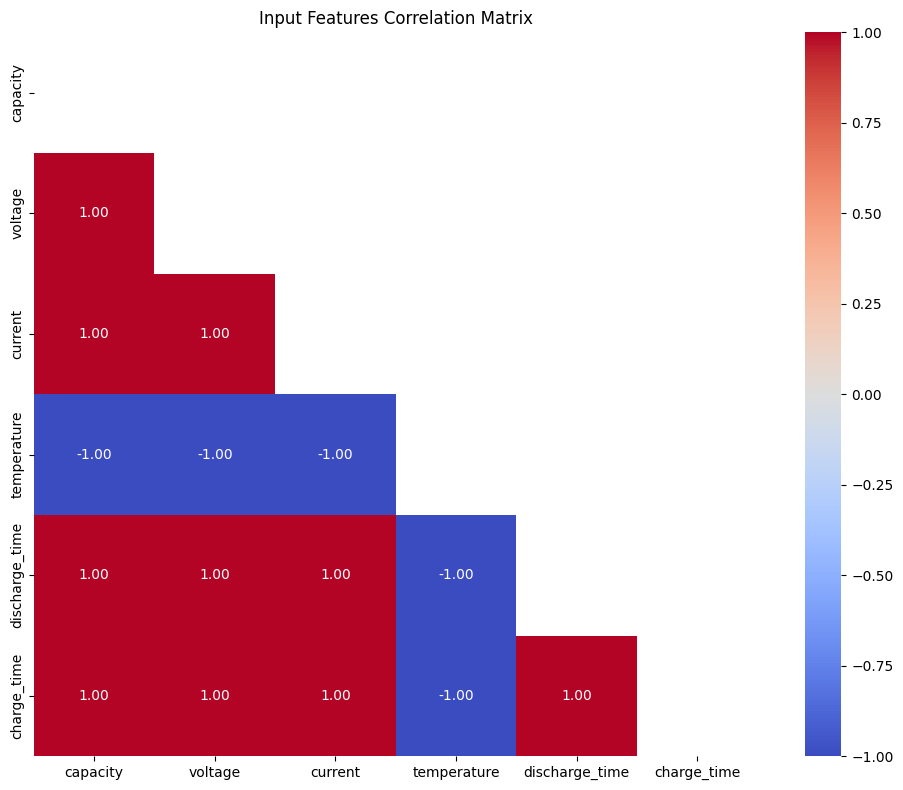

### Strong Correlations (|r| > 0.7)

capacity - voltage: 0.998
capacity - current: 0.999
capacity - temperature: -1.000
capacity - discharge_time: 1.000
capacity - charge_time: 1.000
voltage - current: 0.999
voltage - temperature: -0.998
voltage - discharge_time: 0.998
voltage - charge_time: 0.998
current - temperature: -0.999
current - discharge_time: 0.999
current - charge_time: 0.999
temperature - discharge_time: -1.000
temperature - charge_time: -1.000
discharge_time - charge_time: 1.000


In [34]:
# Correlation Analysis
display(Markdown("## Feature Correlations"))

if len(processed_df.select_dtypes(include=[np.number]).columns) > 1:
    corr_matrix = processed_df.corr()
    
    plt.figure(figsize=(10, 8))
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  # Mask upper triangle
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0,
                square=True, fmt='.2f', mask=mask)
    plt.title('Input Features Correlation Matrix')
    plt.tight_layout()
    plt.show()
    
    # Display strong correlations
    display(Markdown("### Strong Correlations (|r| > 0.7)"))
    high_corr_pairs = []
    
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            corr_value = corr_matrix.iloc[i, j]
            if abs(corr_value) > 0.7:
                high_corr_pairs.append((
                    corr_matrix.columns[i],
                    corr_matrix.columns[j],
                    corr_value
                ))
    
    if high_corr_pairs:
        for feat1, feat2, corr in high_corr_pairs:
            print(f"{feat1} - {feat2}: {corr:.3f}")
    else:
        print("No strong correlations found.")
else:
    print("Not enough numerical features for correlation analysis.")

In [35]:
# Feature Engineering Suggestions
display(Markdown("## Feature Engineering Suggestions"))

display(Markdown("### Potential Derived Features for Battery Analytics"))

suggestions = {
    'SoH Prediction': [
        "Capacity fade rate (derivative of capacity over cycles)",
        "Internal resistance (estimated from voltage drop under load)",
        "Coulombic efficiency (charge discharged / charge charged)",
        "Voltage curve characteristics during charge/discharge"
    ],
    'RUL Prediction': [
        "Cycle count or time-based features",
        "Degradation trends (slopes of key parameters)",
        "Rate of capacity fade acceleration",
        "Historical performance metrics"
    ],
    'SoC Estimation': [
        "Open Circuit Voltage (OCV) relationships",
        "Coulomb counting (integration of current over time)",
        "Voltage relaxation characteristics",
        "Temperature-compensated voltage readings"
    ]
}

if PREDICTION_TARGET in suggestions:
    display(Markdown(f"**For {PREDICTION_TARGET} prediction, consider:**"))
    for suggestion in suggestions[PREDICTION_TARGET]:
        print(f"• {suggestion}")

## Feature Engineering Suggestions

### Potential Derived Features for Battery Analytics

In [36]:
# Save Processed Data
display(Markdown("## Export Processed Data"))

output_filename = "battery_features_processed.csv"
try:
    processed_df.to_csv(output_filename, index=False)
    print(f"Processed features saved to: {output_filename}")
    
    # Also save the feature mapping
    mapping_df = pd.DataFrame(list(feature_mapping.items()), 
                             columns=['Standard_Feature', 'Original_Column'])
    mapping_df.to_csv("feature_mapping.csv", index=False)
    print("Feature mapping saved to: feature_mapping.csv")
    
    # Save configuration
    config_info = {
        'prediction_target': PREDICTION_TARGET,
        'original_file': DATA_FILE_PATH,
        'extraction_date': pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S'),
        'features_extracted': list(processed_df.columns)
    }
    config_df = pd.DataFrame([config_info])
    config_df.to_csv("extraction_config.csv", index=False)
    print("Extraction configuration saved to: extraction_config.csv")
    
except Exception as e:
    print(f"Error saving files: {e}")

## Export Processed Data

Processed features saved to: battery_features_processed.csv
Feature mapping saved to: feature_mapping.csv
Extraction configuration saved to: extraction_config.csv


In [37]:
# Next Steps Preparation
display(Markdown("## Next Steps for Model Development"))

display(Markdown("### For {} Prediction:".format(PREDICTION_TARGET)))

next_steps = {
    'SoH': [
        "Calculate SoH from capacity measurements: SoH = (Current Capacity / Initial Capacity) × 100%",
        "Use cycle data to track degradation patterns",
        "Consider voltage and temperature patterns during operation"
    ],
    'RUL': [
        "Define EOL (End of Life) criteria (e.g., 80% of initial capacity)",
        "Track degradation trajectory over cycles/time",
        "Use historical data to build degradation models"
    ],
    'SoC': [
        "Implement coulomb counting with calibration points",
        "Use OCV-SoC relationships if available",
        "Consider temperature and aging effects on SoC estimation"
    ]
}

if PREDICTION_TARGET in next_steps:
    for i, step in enumerate(next_steps[PREDICTION_TARGET], 1):
        print(f"{i}. {step}")

display(Markdown("### General Modeling Steps:"))
general_steps = [
    "Calculate target variable using appropriate methods",
    "Split data into training and testing sets",
    "Perform feature scaling/normalization",
    "Train machine learning models (Regression for SoH/RUL, Classification/Regression for SoC)",
    "Validate model performance using cross-validation",
    "Deploy the trained model for predictions"
]

for i, step in enumerate(general_steps, 1):
    print(f"{i}. {step}")

## Next Steps for Model Development

### For SoH Prediction:

1. Calculate SoH from capacity measurements: SoH = (Current Capacity / Initial Capacity) × 100%
2. Use cycle data to track degradation patterns
3. Consider voltage and temperature patterns during operation


### General Modeling Steps:

1. Calculate target variable using appropriate methods
2. Split data into training and testing sets
3. Perform feature scaling/normalization
4. Train machine learning models (Regression for SoH/RUL, Classification/Regression for SoC)
5. Validate model performance using cross-validation
6. Deploy the trained model for predictions


In [38]:
# Summary Report
display(Markdown("## Processing Summary"))

print(f"{'='*60}")
print("BATTERY FEATURE EXTRACTION SUMMARY")
print(f"{'='*60}")
print(f"Original dataset dimensions: {raw_df.shape}")
print(f"Processed features dimensions: {processed_df.shape}")
print(f"Prediction target: {PREDICTION_TARGET}")

print(f"\nInput Features Extracted:")
for feature in feature_mapper.standard_features:
    status = "✓" if feature in processed_df.columns else "✗"
    original_name = feature_mapping.get(feature, "Not found")
    print(f"  {status} {feature:15} -> {original_name}")

print(f"\nData Quality:")
print(f"  Total samples: {len(processed_df)}")
print(f"  Missing values: {processed_df.isnull().sum().sum()}")

print(f"\nNext Phase - {PREDICTION_TARGET} Prediction:")
print("  1. Calculate target variable using domain knowledge")
print("  2. Perform feature engineering based on battery physics")
print("  3. Train machine learning models")
print("  4. Validate and deploy the prediction system")

print(f"\nFiles generated:")
print("  - battery_features_processed.csv: Cleaned feature data")
print("  - feature_mapping.csv: Mapping of original to standard names")
print("  - extraction_config.csv: Processing configuration")

## Processing Summary

BATTERY FEATURE EXTRACTION SUMMARY
Original dataset dimensions: (8, 7)
Processed features dimensions: (8, 6)
Prediction target: SoH

Input Features Extracted:
  ✓ capacity        -> Batt_Capacity_mAh
  ✓ voltage         -> Cell_Voltage_V
  ✓ current         -> Current_A
  ✓ temperature     -> Temperature_C
  ✓ discharge_time  -> Discharge_Time_s
  ✓ charge_time     -> Charge_Time_min

Data Quality:
  Total samples: 8
  Missing values: 0

Next Phase - SoH Prediction:
  1. Calculate target variable using domain knowledge
  2. Perform feature engineering based on battery physics
  3. Train machine learning models
  4. Validate and deploy the prediction system

Files generated:
  - battery_features_processed.csv: Cleaned feature data
  - feature_mapping.csv: Mapping of original to standard names
  - extraction_config.csv: Processing configuration
